

<div class="usecase-title">Business establishments  (land use) and jobs</div>

<div class="usecase-authors"><b>Authored by: Harsh Dwivedi</b> </div>

<div class="usecase-duration"><b>Duration:</b> 150 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate to Advanced</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Matplotlib, Machine Learning Basics, Random Forest Regression, XGBoost, Plotly, and Jupyter Notebook</div>
</div>


<header>
<h2>Scenario</h2>
<div>This use case aims to help urban planners to understand the intricate dynamics between business establishments, land use, and employment patterns within CLUE locations. By leveraging the City of Melbourne’s Census of Land Use and Employment (CLUE) dataset, this analysis aims to uncover valuable insights that can guide strategic decisions. The primary objective is to identify potential business locations, attract employees in specific job sectors, and optimize resource allocation. This, in turn, will contribute to fostering economic growth and creating vibrant, sustainable communities within the city.
We will be gaining n a comprehensive understanding of how spatial and employment data interact. By analyzing correlations between business establishments and employment patternswe willan pinpoint optimal business locations and develop data-driven urban development strategies

I believe this s holistic approach not only supports economic development but also enhances the overall quality of life for Melbourne’s residentsdiv>

## Learning Objectives

At the end of this use case you will:

* Understand how to analyze spatial and employment data.
* Predicting employment patterns
* Top 5 business hotspots
* Predicting employment patterns
* Identify correlations between business establishments and employment patterns.
* Gain insights into optimal business locations.
* Learn how to use data to inform urban development strategies.
* Develop skills in data visualization and interpretationnd interpretation.}

## Introduction

In the bustling city of Melbourne, urban planners and policymakers are tasked with the challenge of understanding the intricate dynamics between business establishments, land use, and employment patterns. The City of Melbourne’s Census of Land Use and Employment (CLUE) dataset provides a wealth of information that can be leveraged to gain insights into these relationships.

The objective of this analysis is to examine business establishments within CLUE locations and explore land usage across various sectors of employment. By doing so, business owners and stakeholders can identify potential business locations, attract employees in specific job sectors, and optimize resource allocation. This, in turn, contributes to economic growth and the creation of vibrant, sustainable communities within Melbourn

Datasets:

-
Data Set 1 [Blocks for Census of Land Use](https://data.melbourne.vic.gov.au/explore/dataset/blocks-for-census-of-land-use-and-employment-clue/table/?location=15,-37.79026,144.88366&basemap=mbs-7a7333on<br>This dataset maps CLUE datasets to CLUE blocks, providing geographical boundaries that can be linked to CLUE information. It includes data on establishments, employment, and floor space from 2002 to 2019.s. The dataset is imported from Melbourne Open Data website, using API v2.PEta:

-
Data Set 2 [Jobs per CLUE industry ](https://data.melbourne.vic.gov.au/explore/dataset/employment-by-block-by-clue-industry/export/).<br>This dataset covers employment data from 2002 to 2022, showing the number of jobs per CLUE block, classified by industry and small area allocation. It has been confidentialized to protect commercially sensitive information.

-
Data Set 3 [Floor space per space use ](https://data.melbourne.vic.gov.au/explore/dataset/floor-space-by-use-by-block/information//).<br>This dataset shows floor space (in square meters) per CLUE block, classified by their space use and small area allocation. It covers the period from 2002 to 2022 and has been confidentialized to protect commercially sensitive information. 

## Importing all the desired Dependencies 

First, we need to import the necessary libraries for data analysis and visualization.

In [12]:
import plotly.express as px 
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import folium
import seaborn as sns
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import os
import json
import io
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.interpolate import make_interp_spline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap
import plotly.graph_objects as go

## Loading the dataset with help of API V2


In [14]:
import requests
import pandas as pd
from io import StringIO

#Function to collect data
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        #'api_key': apikey  #use if use datasets API_key permissions
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')

### Loading 1st dataset

Let's load the first dataset and then check how many columns it has and what kind of data is in each one.

In [16]:
dataset_id_1 = 'blocks-for-census-of-land-use-and-employment-clue'
# Save dataset to df varaible
df = collect_data(dataset_id_1)
# Check number of records in df
print(f'The dataset contains {len(df)} records.')
df.head(3)

The dataset contains 606 records.


geo_point_2d  \
0   -37.82296169692379, 144.95049282288122   
1   -37.78537422996195, 144.94085920366408   
2  -37.777687358375964, 144.94600024715058   

                                           geo_shape  block_id  clue_area  
0  {"coordinates": [[[144.9479230372, -37.8233694...      1112  Docklands  
1  {"coordinates": [[[144.9426153438, -37.7866287...       927  Parkville  
2  {"coordinates": [[[144.9425926939, -37.7787229...       929  Parkville

### Loading 2nd dataset

Similarly load the second dataset and see what data it contains.

In [18]:
dataset_id_2 = 'employment-by-block-by-clue-industry'
df2 = collect_data(dataset_id_2)
print(f'The dataset contains {len(df2)} records.')
# View df
df.head(3)

The dataset contains 12394 records.


geo_point_2d  \
0   -37.82296169692379, 144.95049282288122   
1   -37.78537422996195, 144.94085920366408   
2  -37.777687358375964, 144.94600024715058   

                                           geo_shape  block_id  clue_area  
0  {"coordinates": [[[144.9479230372, -37.8233694...      1112  Docklands  
1  {"coordinates": [[[144.9426153438, -37.7866287...       927  Parkville  
2  {"coordinates": [[[144.9425926939, -37.7787229...       929  Parkville

### Loading 3rd dataset

In [20]:
dataset_id_3 = 'floor-space-by-use-by-block'
df3 = collect_data(dataset_id_3)
print(f'The second dataset contains {len(df3)} records.')
print(df3.head(3))

The second dataset contains 12394 records.
   census_year  block_id  clue_small_area  commercial_accommodation  \
0         2013      2387  North Melbourne                       0.0   
1         2013      2390  North Melbourne                       0.0   
2         2013      2501       Kensington                       0.0   

   common_area  community_use  educational_research  \
0          NaN            0.0                   NaN   
1       1040.0            0.0                   NaN   
2          0.0            NaN                   0.0   

   entertainment_recreation_indoor  equipment_installation  hospital_clinic  \
0                              NaN                     0.0              0.0   
1                              0.0                     0.0              0.0   
2                              0.0                     0.0              0.0   

   ...  transport  transport_storage_uncovered  unoccupied_under_construction  \
0  ...        0.0                          0.0       

##  Cleaning the data

Let's start by cleaning and preprocessing the datasets to make them ready for analysis.We will handle missing values, converting data types, and merging datasets.

* Step 1 : For all the datasets I am extracting coordinates from geo_point_2d and geo_shape and then converting latitude and longitude.
* Step 2 : I'm filling missing values in the clue_area column with 'Unknown' to avoid dropping valuable data.
* Step 3 :  I'm imputing missing values in numeric columns with the column's mean to maintain data integrity.
* Step 4 : I'm standardizing the total_floor_space_in_block column to ensure that features are on a similar scale, which is often beneficial for machine learning algorithms.
* Step 5 : One-hot encoding should be applied to categorical columns like clue_area and clue_small_area


In [22]:

# breaking down the geo_point_2d column into latitude and longitude
df[['latitude', 'longitude']] = df['geo_point_2d'].str.split(',', expand=True)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Extract 'coordinates' from 'geo_shape'
df['coordinates'] = df['geo_shape'].apply(lambda x: json.loads(x)['coordinates'])

print("Available columns in df:\n", df.columns)

if 'clue_area' in df.columns:
    # Impute missing values in categorical columns
    df['clue_area'] = df['clue_area'].fillna('Unknown')
    
    # One-hot encoding for categorical variables like 'clue_area'
    df = pd.get_dummies(df, columns=['clue_area'])
else:
    print("'clue_area' column is not found in the DataFrame.")

# Handle missing values only in numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Clean employment dataset df2
df2 = df2.fillna(0)
df3 = df3.fillna(0)

z_scores = np.abs(stats.zscore(df3['total_floor_space_in_block']))
df3 = df3[(z_scores < 3)]  

# Standardize 'total_floor_space_in_block' column in df3
scaler = StandardScaler()
df3['total_floor_space_in_block'] = scaler.fit_transform(df3[['total_floor_space_in_block']])

# Check for remaining missing values
print("Missing values in df:\n", df.isnull().sum())
print("Missing values in df2:\n", df2.isnull().sum())
print("Missing values in df3:\n", df3.isnull().sum())


Available columns in df:
 Index(['geo_point_2d', 'geo_shape', 'block_id', 'clue_area', 'latitude',
       'longitude', 'coordinates'],
      dtype='object')
Missing values in df:
 geo_point_2d                              0
geo_shape                                 0
block_id                                  0
latitude                                  0
longitude                                 0
coordinates                               0
clue_area_Carlton                         0
clue_area_Docklands                       0
clue_area_East Melbourne                  0
clue_area_Kensington                      0
clue_area_Melbourne (CBD)                 0
clue_area_Melbourne (Remainder)           0
clue_area_North Melbourne                 0
clue_area_Parkville                       0
clue_area_Port Melbourne                  0
clue_area_South Yarra                     0
clue_area_Southbank                       0
clue_area_West Melbourne (Industrial)     0
clue_area_West Melbourne (Re

## Cleaning Dataset 2

Now we move on to clean individual datasets .In this code, we're cleaning the df2 dataset. We're filling missing values with 0 and checking for missing block_id values, then deciding whether to drop or fill them.

In [24]:

df2.fillna(0, inplace=True)

missing_block_id = df2['block_id'].isnull().sum()
if missing_block_id > 0:
    print(f"Missing 'block_id' in {missing_block_id} records.")
    # Drop or fill missing 'block_id'
    df2.dropna(subset=['block_id'], inplace=True)


## Cleaning Dataset 3

Similarly for dataset 3 , we will fill missing values with 0 and check for missing block_id values, then deciding whether to drop or fill them.

In [26]:

df3.fillna(0, inplace=True)

# Ensure consistency in the 'block_id' and other key fields
missing_block_id = df3['block_id'].isnull().sum()
if missing_block_id > 0:
    print(f"Missing 'block_id' in {missing_block_id} records.")
    df3.dropna(subset=['block_id'], inplace=True)


## Joining Datasets and Handling Inconsistencies


We merged the spatial layer, employment, and floor space datasets on common columns such as block_id and census_year to create a comprehensive dataset for analysis.In this code, we're merging the datasets df, df2, and df3 based on the block_id column. Before merging, we're handling any remaining missing values in df by filling them with appropriate values. 


In [28]:
df.fillna({
    'latitude': df['latitude'].mean(),
    'longitude': df['longitude'].mean(),
    'clue_area': 'Unknown'
}, inplace=True)

# checking if block_id in df3 and df3 are consistent with df1
inconsistent_blocks = set(df2['block_id']).difference(df['block_id'])
if inconsistent_blocks:
    print(f"Inconsistent block IDs found in df2: {inconsistent_blocks}")

inconsistent_blocks = set(df3['block_id']).difference(df['block_id'])
if inconsistent_blocks:
    print(f"Inconsistent block IDs found in df3: {inconsistent_blocks}")


#print("Columns in df before merge:\n", df.columns)
#print("Columns in df2 before merge:\n", df2.columns)
#print("Columns in df3 before merge:\n", df3.columns)


Inconsistent block IDs found in df2: {0}


## Feature Engineering

Now, let us create some new features representing proportiOns , such as the percentage of a specific land use or employment sector in a block.
* Step 1 :  Renaming clue_small_area_x column to clue_small_area.
* Step 2 :  If the clue_small_area column exists, we're calculating the distance to the Melbourne CBD for each record.
* Step 3 : We're applying a log transformation to the total_floor_space_in_block column and standardizing numerical columns to ensure they're on a similar scale.
* Step 4 : Combining eatures that might interact with each other, such as employment sectors and floor space for related industries.
* Step 5 :  The code applies a log transformation to the total_floor_space_in_block column to handle skewed data and standardizes numerical columns to ensure they have a similar scale
* Step 6 : We will be ranking and selecting the most relevant features



In [30]:
# Step 1: Merge datasets on 'block_id'
merged_df = df.merge(df2, on='block_id', how='inner').merge(df3, on='block_id', how='inner')

# Step 2: Rename columns to avoid ambiguity
merged_df.rename(columns={'clue_small_area_x': 'clue_small_area', 'clue_small_area_y': 'clue_small_area_from_df3'}, inplace=True)


merged_df['latitude'] = pd.to_numeric(merged_df['latitude'], errors='coerce')
merged_df['longitude'] = pd.to_numeric(merged_df['longitude'], errors='coerce')


cbd_coordinates = (-37.8136, 144.9631)
merged_df['distance_to_cbd'] = np.sqrt((merged_df['latitude'] - cbd_coordinates[0])**2 + 
                                       (merged_df['longitude'] - cbd_coordinates[1])**2)

# Step 5: Aggregate total floor space by 'clue_small_area'
area_aggregates = merged_df.groupby('clue_small_area')['total_floor_space_in_block'].sum().reset_index()
area_aggregates.rename(columns={'total_floor_space_in_block': 'total_space_per_area'}, inplace=True)
merged_df = merged_df.merge(area_aggregates, on='clue_small_area', how='left')

# Step 6: Feature transformations - Log transform of total floor space
merged_df['log_total_floor_space'] = np.log1p(merged_df['total_floor_space_in_block'])


scaler = StandardScaler()
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])


print("Columns in merged_df after feature engineering:\n", merged_df.columns)
print("Missing values in merged_df:\n", merged_df.isnull().sum())



Columns in merged_df after feature engineering:
 Index(['geo_point_2d', 'geo_shape', 'block_id', 'latitude', 'longitude',
       'coordinates', 'clue_area_Carlton', 'clue_area_Docklands',
       'clue_area_East Melbourne', 'clue_area_Kensington',
       'clue_area_Melbourne (CBD)', 'clue_area_Melbourne (Remainder)',
       'clue_area_North Melbourne', 'clue_area_Parkville',
       'clue_area_Port Melbourne', 'clue_area_South Yarra',
       'clue_area_Southbank', 'clue_area_West Melbourne (Industrial)',
       'clue_area_West Melbourne (Residential)', 'census_year_x',
       'clue_small_area', 'accommodation', 'admin_and_support_services',
       'agriculture_and_mining', 'arts_and_recreation_services',
       'business_services', 'construction', 'education_and_training',
       'electricity_gas_water_and_waste_services', 'finance_and_insurance',
       'food_and_beverage_services', 'health_care_and_social_assistance',
       'information_media_and_telecommunications', 'manufacturing_x'

## Data Analysis and Visualization

In this section, I will delve into the core data to uncover key trends and insights by analyzing both yearly trends in jobs and spatial distribution patterns. By using various visualization techniques, I aim to highlight how employment and business establishments have evolved over time, revealing sector-specific growth or decline and how this ties into the spatial dynamics across different regions.

## Analyzing Yearly Trends in Accommodation and Jobs

In this code, we're analyzing the trend of accommodation and job growth over time. First, we're aggregating the total accommodation and total jobs per year. Then, we're merging these two datasets based on the census year. Finally, we're calculating the yearly increase in accommodation and jobs to understand the growth rate

In [33]:
# Aggregate accommodation data by year
yearly_accommodation = merged_df.groupby('census_year_y')['accommodation'].sum().reset_index()
yearly_jobs = merged_df.groupby('census_year_y')['total_jobs_in_block'].sum().reset_index()

# Merge both yearly dataframes
yearly_data = pd.merge(yearly_accommodation, yearly_jobs, on='census_year_y', suffixes=('_accommodation', '_jobs'))

yearly_data['jobs_increase'] = yearly_data['total_jobs_in_block'].diff()
print(yearly_data)

    census_year_y  accommodation  total_jobs_in_block  jobs_increase
0       -1.689148     105.833989           252.847671            NaN
1       -1.522808     105.833989           252.847671       0.000000
2       -1.356468     105.833989           252.847671       0.000000
3       -1.190127     105.833989           252.847671       0.000000
4       -1.023787     105.833989           252.847671       0.000000
5       -0.857447      74.867179           185.348857     -67.498814
6       -0.691107     -41.258359           -99.071037    -284.419894
7       -0.524767     -41.258359           -99.071037       0.000000
8       -0.358426     -41.258359           -99.071037       0.000000
9       -0.192086     -41.258359           -99.071037       0.000000
10      -0.025746     -41.258359           -99.071037       0.000000
11       0.140594     -41.258359           -99.071037       0.000000
12       0.306935     -41.258359           -99.071037       0.000000
13       0.473275     -41.258359  

#### Observations


* Total jobs in the block remained largely unchanged from 2002 to 2006, showing no significant growth during these years.

* A modest job increase occurred between 2007 and 2008, with an additional 21,151 jobs in 2007 and 25,630 jobs in 2008, peaking at 8,654,109 total jobs.

* From 2009 to 2019, the number of jobs remained flat, with no further increases or declines in total employment within the block.

* In 2020, a small decline of 1,014 jobs occurred, possibly due to external factors such as the economic impact of the COVID-19 pandemic, followed by stability in 2021 and 2022.

## Job Trends Over Time by Sector

We will now plot a spline chart to show increase/decrease in jobs in various sector. 


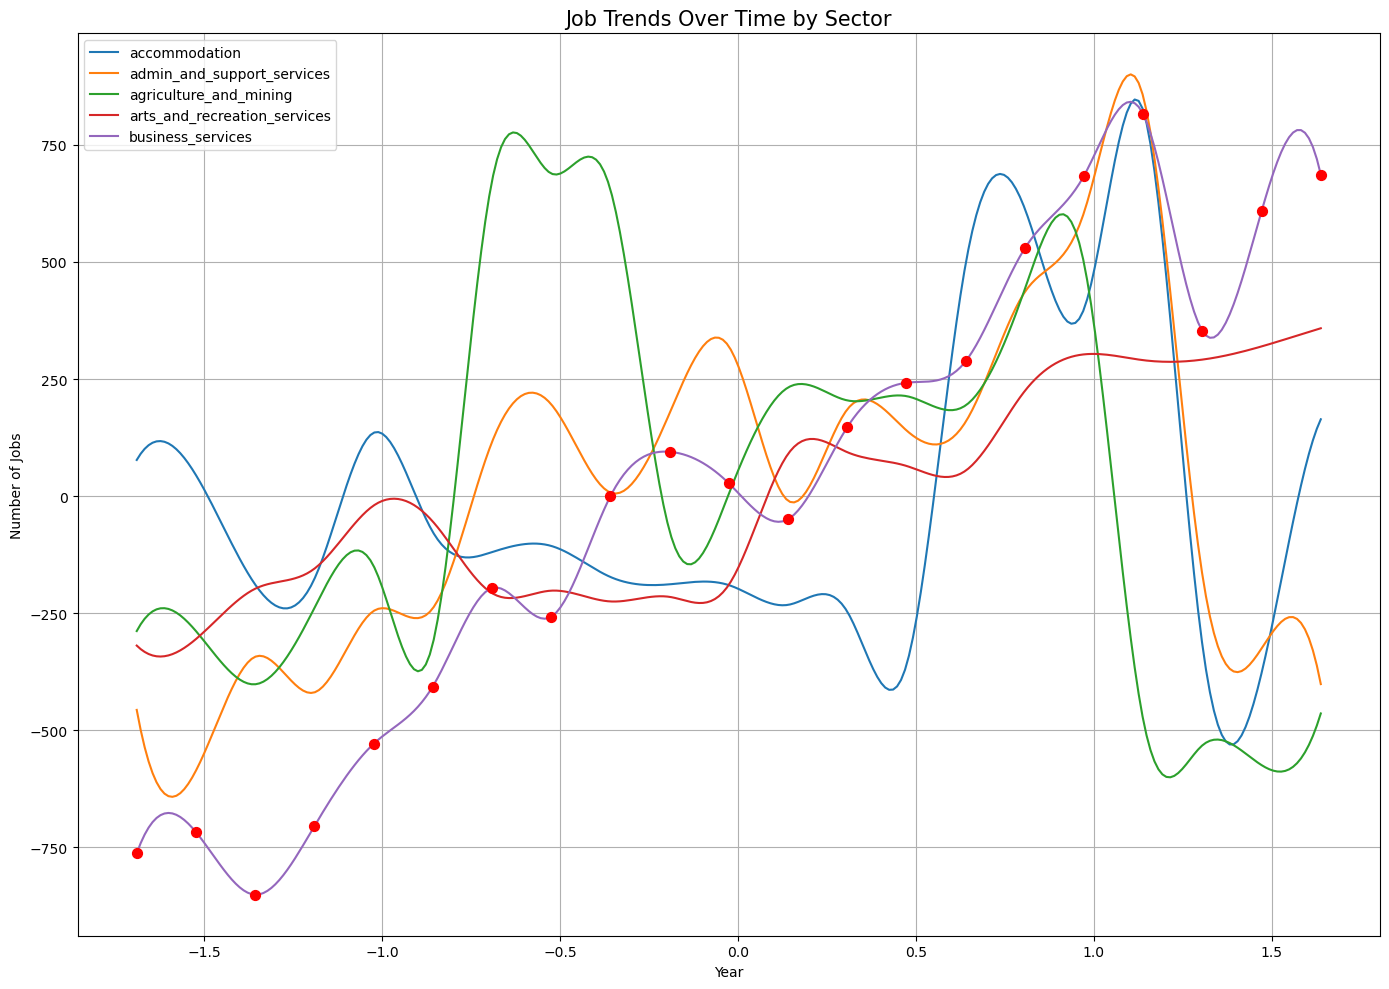

In [36]:

years = merged_df['census_year_x'].unique()
years.sort()
sectors = ['accommodation', 'admin_and_support_services', 'agriculture_and_mining',
           'arts_and_recreation_services', 'business_services']

plt.figure(figsize=(14, 10))

for sector in sectors:
    sector_data = merged_df.groupby('census_year_x')[sector].sum()
    
    # Smooth the data using spline
    xnew = np.linspace(years.min(), years.max(), 300)
    spl = make_interp_spline(sector_data.index, sector_data.values, k=3)
    sector_data_smooth = spl(xnew)
    
    plt.plot(xnew, sector_data_smooth, label=sector)

plt.scatter(sector_data.index, sector_data.values, color='red', s=50, zorder=5)  # Original data points
plt.title('Job Trends Over Time by Sector', size=15)
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Observations 

* Almost all the business sectors saw a decline in 2020 with sharpest decline in business services .
* Business-services had the most numbe of job increases , whule in 2012 arts_recreation had a massive bump.
* Agriculture has minimal increase in last 2 decades.

### Distribution of Business Establishments by CLUE Small Area

* Kensington has the most number of business establishments
* East Melbourne, West Melbourne (Residential), and South Yarra (East and West) have the lowest counts, indicating less business activity in these areas.
  

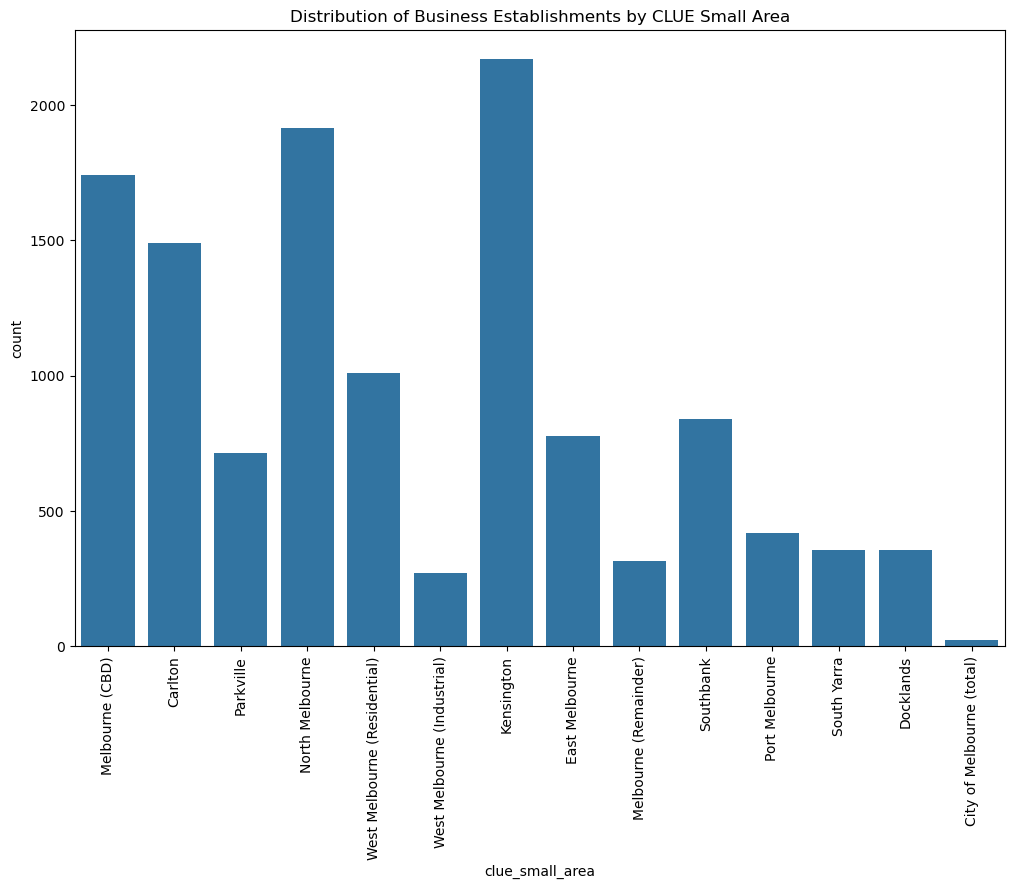

In [39]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df2, x='clue_small_area')
plt.title('Distribution of Business Establishments by CLUE Small Area')
plt.xticks(rotation=90)
plt.show()


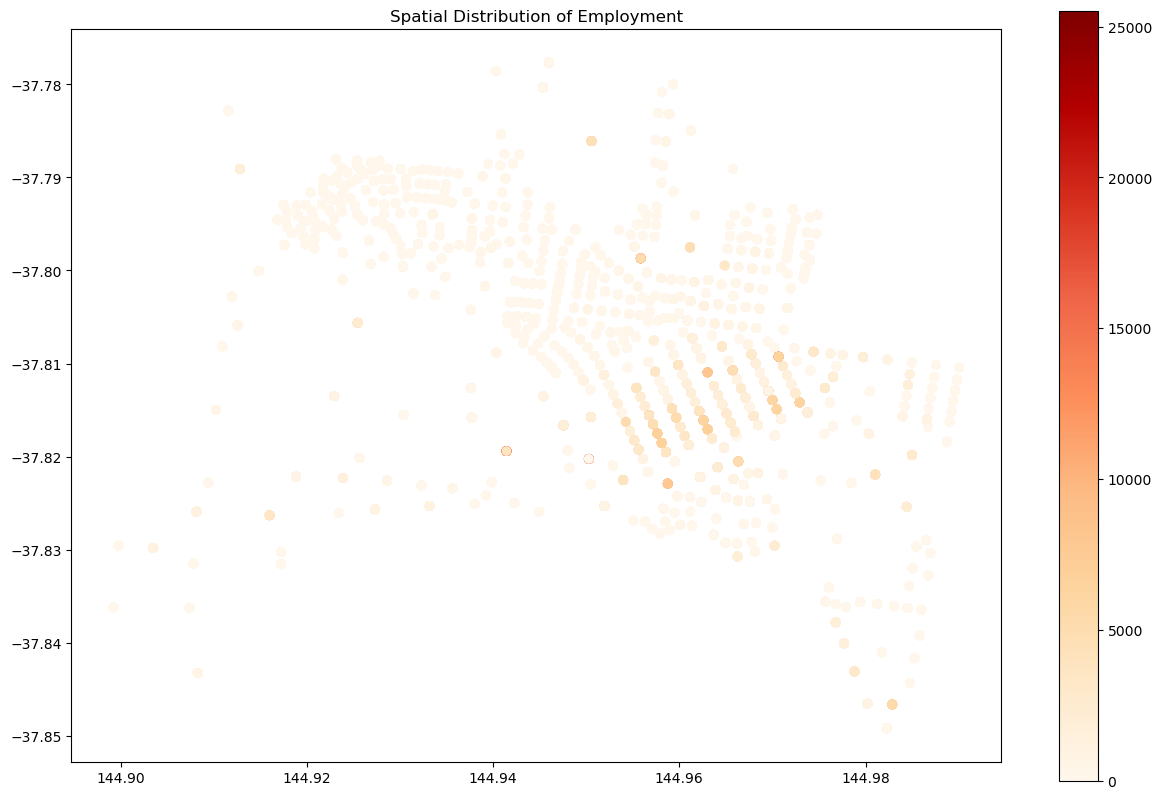

In [40]:
df[['latitude', 'longitude']] = df['geo_point_2d'].str.split(',', expand=True)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Merge spatial layer with employment data
merged_data = df.merge(df2, left_on='block_id', right_on='block_id')

# Convert merged_data to a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data['longitude'], merged_data['latitude']))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='total_jobs_in_block', ax=ax, legend=True, cmap='OrRd')
plt.title('Spatial Distribution of Employment')
plt.show()


### Employment Patterns Over Time By clue small 

By plotting the total jobs in the block against census years and differentiating areas by color, I can easily visualize which areas have seen the most growth in employment and which ones have remained stable This will help us understand how employment has evolved in various CLUE small areas over time. By aggregating the data by decade, we can identify broader trends and gain insights into long-term changes in employment distribution.


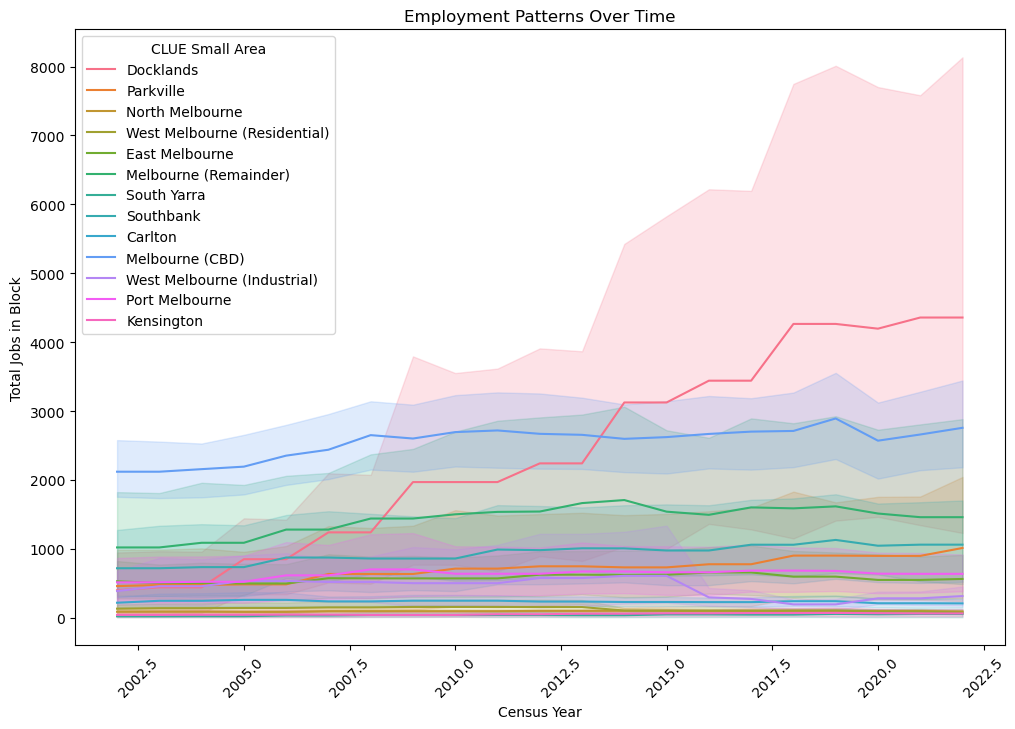

In [42]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=merged_data, x='census_year', y='total_jobs_in_block', hue='clue_small_area')
plt.title('Employment Patterns Over Time')
plt.xticks(rotation=45)
plt.xlabel('Census Year')
plt.ylabel('Total Jobs in Block')
plt.legend(title='CLUE Small Area')
plt.show()


#### Observations :

* Docklands (represented in red) stands out as a major employment hub, experiencing significant growth starting around 2012 and continuing until 2022. 
* Regions like Kensington and Carlton show relatively flat growth, indicating minimal changes in total jobs over the observed period.
* West Melbourne (Residential) and Parkville, also show moderate increases in job numbers

#### Land Use over the years

Over the years, Melbourne has seen significant changes in land usage, driven by urban development and economic growth.

In [45]:
# Define use_cols at the beginning of the script
use_cols = ['commercial_accommodation', 'common_area', 'community_use',
            'educational_research', 'office', 'residential_apartment', 'retail_shop']

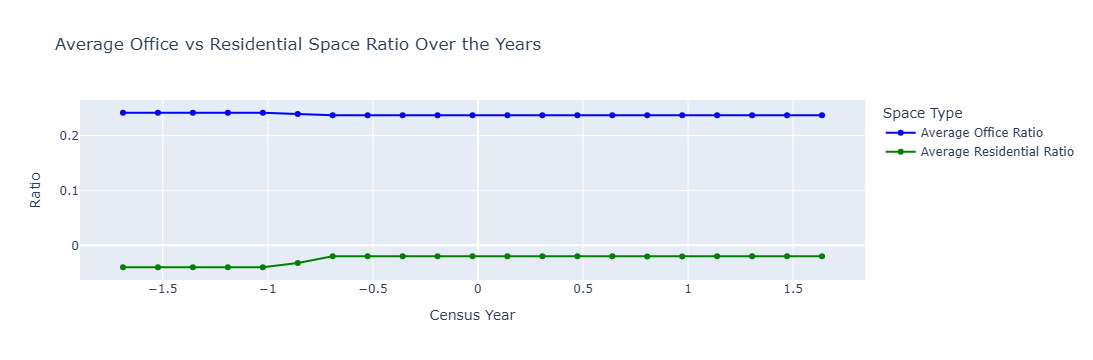

In [46]:
def analyze_land_use_patterns(df):
       
    # Default display: Distribution of Floor Space by Use (Interactive Bar Chart)
    land_use = df[use_cols].sum().sort_values(ascending=False).reset_index()
    land_use.columns = ['Land Use Type', 'Total Floor Space']
    
    fig1 = px.bar(land_use, x='Land Use Type', y='Total Floor Space',
                  title='Distribution of Floor Space by Use',
                  labels={'Total Floor Space': 'Total Floor Space (sqm)'})
    fig1.update_layout(xaxis_title="Land Use Type", yaxis_title="Total Floor Space", 
                       xaxis_tickangle=-45, showlegend=False)
    fig1.show()

    # Analyze office or residential space change over time (Interactive Line Chart)
    df['total_floor_space'] = df[use_cols].sum(axis=1)
    df['office_ratio'] = df['office'] / df['total_floor_space']
    df['residential_ratio'] = df['residential_apartment'] / df['total_floor_space']
    
    avg_office_ratio = df.groupby('census_year_x')['office_ratio'].mean().reset_index()
    avg_residential_ratio = df.groupby('census_year_x')['residential_ratio'].mean().reset_index()
    
    fig2 = go.Figure()
    
    fig2.add_trace(go.Scatter(x=avg_office_ratio['census_year_x'], y=avg_office_ratio['office_ratio'],
                              mode='lines+markers', name='Average Office Ratio',
                              line=dict(color='blue')))
    
    fig2.add_trace(go.Scatter(x=avg_residential_ratio['census_year_x'], y=avg_residential_ratio['residential_ratio'],
                              mode='lines+markers', name='Average Residential Ratio',
                              line=dict(color='green')))
    
    fig2.update_layout(title="Average Office vs Residential Space Ratio Over the Years",
                       xaxis_title="Census Year", yaxis_title="Ratio",
                       hovermode="x unified", legend_title="Space Type")
    
    fig2.show()


analyze_land_use_patterns(merged_df)


#### Observations :

* The largest share of floor space is dedicated to common area .
* Categories like commercial accomodation, educational/research  have smaller shares of floor space

## Zoning Insights
In this analysis, we aim to understand how job density varies with distance from the CBD. By plotting job density against distance to the CBD, we can visually assess if there is any noticeable trend or pattern.

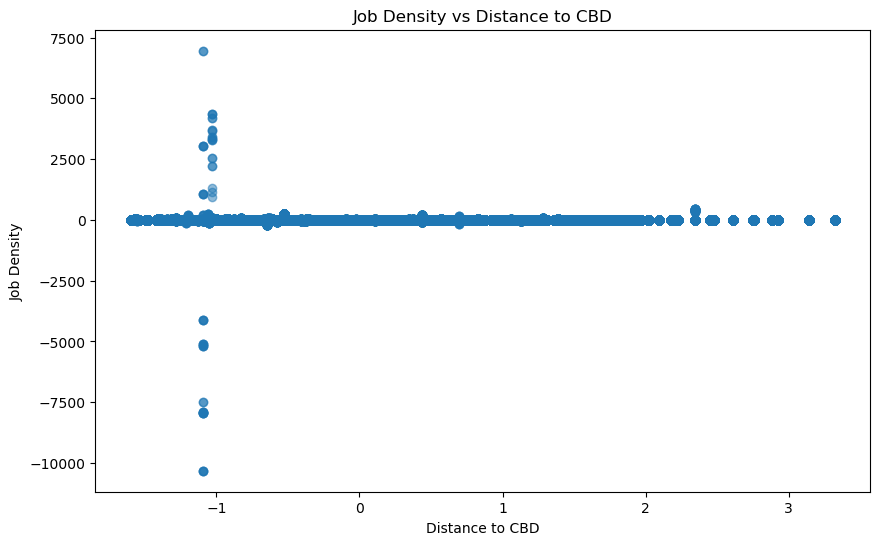

In [49]:
def analyze_urban_planning(df):
    # Analyze relationship between distance to CBD and employment density
    df['job_density'] = df['total_jobs_in_block'] / df['total_floor_space_in_block']
    plt.figure(figsize=(10, 6))
    plt.scatter(df['distance_to_cbd'], df['job_density'], alpha=0.5)
    plt.title('Job Density vs Distance to CBD')
    plt.xlabel('Distance to CBD')
    plt.ylabel('Job Density')
    plt.show()

  
analyze_urban_planning(merged_df)

#### Observations :

* Most points are clustered near the origin, indicating that job density does not vary significantly with distance to the CBD for most blocks.
* There are some outliers with high job density at various distances from the CBD, suggesting that certain areas, regardless of their distance from the CBD, have a high concentration of jobs relative to their floor space.

##  Interactive Map of Employment Distribution

This interactive map allows users to explore the spatial distribution of employment across different blocks. You can see major employment hubs and analyze job density visually.

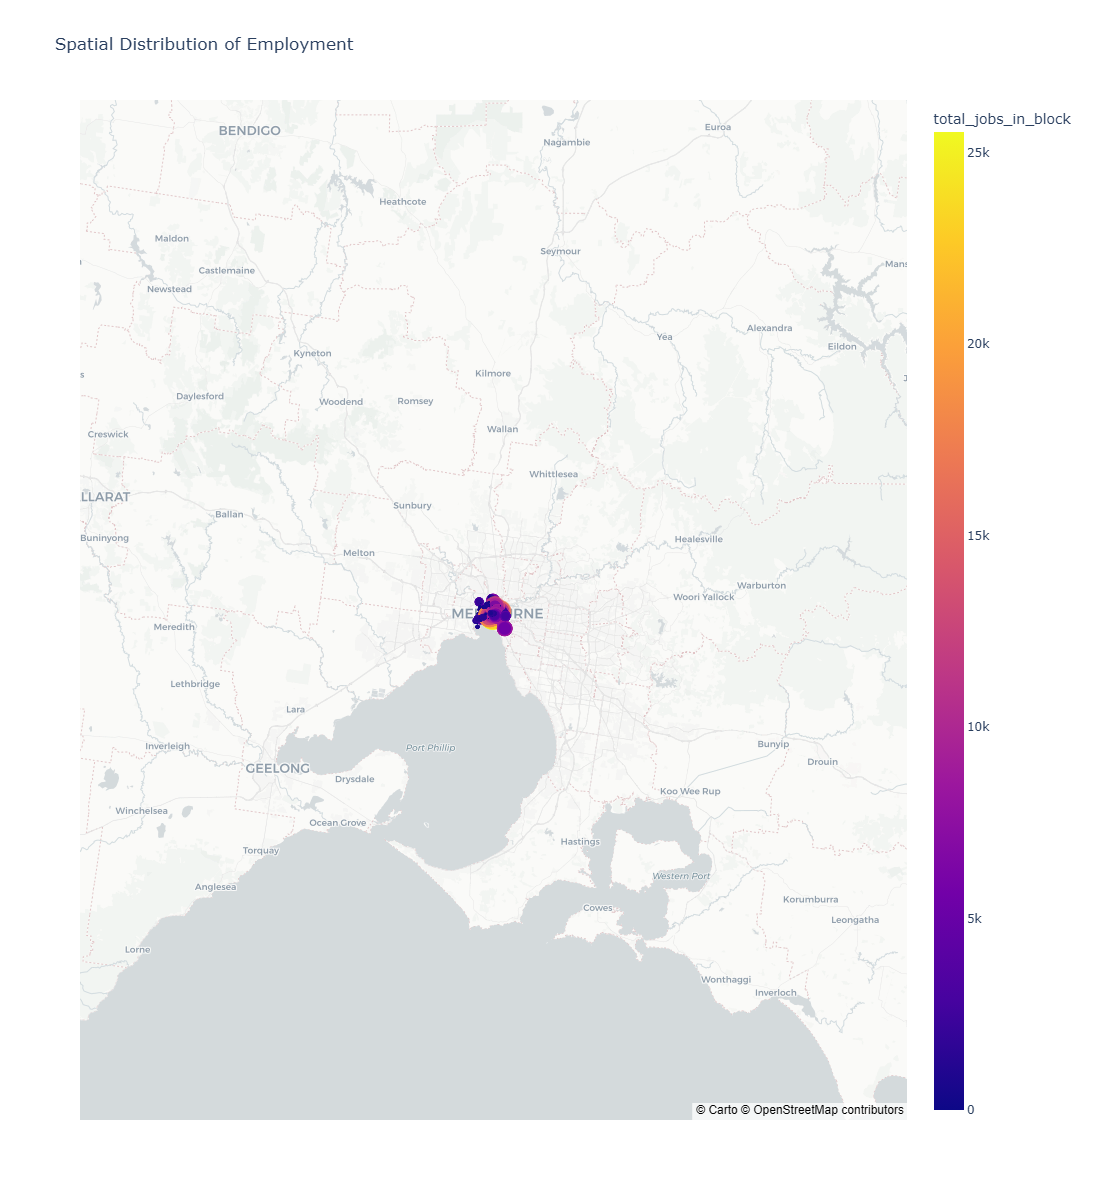

In [52]:
# Interactive map
fig = px.scatter_mapbox(
    merged_data, 
    lat='latitude', 
    lon='longitude', 
    color='total_jobs_in_block', 
    size='total_jobs_in_block',
    mapbox_style="carto-positron", 
    title='Spatial Distribution of Employment',
    height=1200  
)

# Update layout for better legend positioning and readability
fig.update_layout(
    legend=dict(
        title='Total Jobs in Block',
        x=0.98,  # Position the legend on the right
        y=0.98,  # Position the legend at the top
        traceorder='normal',
        font=dict(
            size=10,  # Smaller font size
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=1  # Thinner border
    )
)

fig.show()


## Applying K-Means Clustering to Identify Business Hotspots


In [54]:
import pandas as pd
from sklearn.cluster import KMeans

# Extract relevant columns for clustering
data = merged_df[['latitude', 'longitude']].dropna()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
merged_df['cluster'] = kmeans.fit_predict(data)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Count the number of points in each cluster
cluster_counts = merged_df['cluster'].value_counts()

# Get the centroid coordinates of the top 5 clusters
top_clusters = cluster_counts.index[:5]
centroids = centers[top_clusters]

import folium

# Create a base map centered around Melbourne
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=13)

hotspots = [
    {"name": "Hotspot 1", "latitude": -37.81649338709314, "longitude": 144.9593746816832},
    {"name": "Hotspot 2", "latitude": -37.81027385193321, "longitude": 144.96895152469776},
    {"name": "Hotspot 3", "latitude": -37.80272317246289, "longitude": 144.9454911043396},
    {"name": "Hotspot 4", "latitude": -37.81482455911137, "longitude": 144.91942891148435},
    {"name": "Hotspot 5", "latitude": -37.83819289766458, "longitude": 144.97715040816652}
]

for hotspot in hotspots:
    folium.Marker(
        location=[hotspot["latitude"], hotspot["longitude"]],
        popup=hotspot["name"],
        icon=folium.Icon(color='red')
    ).add_to(melbourne_map)

# Modify the legend to show only "Hotspot"
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 200px; height: 80px; 
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; padding: 10px;">
    <b>Business Hotspots</b><br>
    <i class="fa fa-map-marker fa-2x" style="color:red"></i> Hotspot<br>
</div>
'''

melbourne_map.get_root().html.add_child(folium.Element(legend_html))

# Display the map
melbourne_map



## Applying K-Means Clustering to Plot Clusters

### Introduction
In this section, we apply K-Means clustering to identify and visualize business hotspots within the City of Melbourne. The goal is to categorize different areas based on job density, floor space, and proximity to the Central Business District (CBD).

### Methodology
We used the K-Means clustering algorithm to group the data points into five distinct clusters. Each cluster represents a different type of business area, characterized by specific features such as job density, floor space, and distance to the CBD.

### Cluster Naming and Characteristics
Based on the clustering results, we identified and named the clusters according to their most prominent features:

- **Cluster 0 ("Peripheral Business Hub")**: This cluster is characterized by a high number of blocks but lower average jobs and floor space, indicating a busy area that is less central.
- **Cluster 1 ("Central Employment Zone")**: This cluster has a high job density and is close to the CBD, making it a major employment center.
- **Cluster 2 ("Large Commercial Area")**: This cluster has high average jobs and floor space, suggesting significant commercial activity.
- **Cluster 3 ("Mid-Density Business Area")**: This cluster has moderate job density and floor space with an intermediate distance to the CBD, indicating a developing business area.
- **Cluster 4 ("Mixed Use District")**: This cluster has lower average jobs and floor space with moderate proximity to the CBD, indicating a mix of residential and commercial uses.

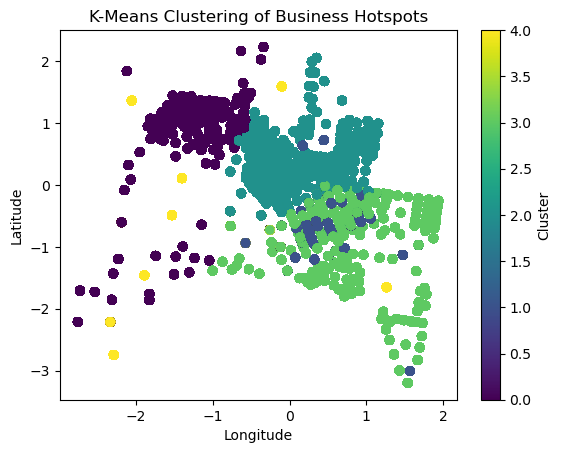

In [56]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['latitude', 'longitude', 'total_jobs_in_block', 'total_floor_space_in_block', 'distance_to_cbd']
X = merged_df[features].copy()

X.fillna(0, inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans

# Define the model with the number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

merged_df['kmeans_cluster'] = clusters


# Plot the clusters
plt.scatter(merged_df['longitude'], merged_df['latitude'], c=merged_df['kmeans_cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of Business Hotspots')
plt.colorbar(label='Cluster')
plt.show()

## Applying XGBoost & GridsearchCv Regression for Job Density Prediction

### Introduction
In this section, we apply the XGBoost regression algorithm to predict job density within the City of Melbourne. The goal is to leverage the City of Melbourne’s Census of Land Use and Employment (CLUE) dataset to understand the factors influencing job density and provide actionable insights for urban planners.

### Methodology
We used the XGBoost regressor, optimized using GridSearchCV, to predict job density based on various features such as geographical coordinates, distance to the CBD, and types of spaces. The steps involved in this process are as follows:

1. **Data Preparation:**
   - Selected relevant features and the target variable (`total_jobs_in_block`).
   - Split the data into training and testing sets.
   - Scaled the features to standardize the data.

2. **Model Training:**
   - Defined a parameter grid for GridSearchCV to find the best hyperparameters for the XGBoost model.
   - Trained the XGBoost model with the best parameters obtained from GridSearchCV.

3. **Model Evaluation:**
   - Evaluated the model's performance using Mean Squared Error (MSE) and R-squared (R²) metrics.
   - Analyzed feature importance to understand the impact of each feature on job density.


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Mean Squared Error: 0.14852033654419308
R-squared Score: 0.8519401292936389


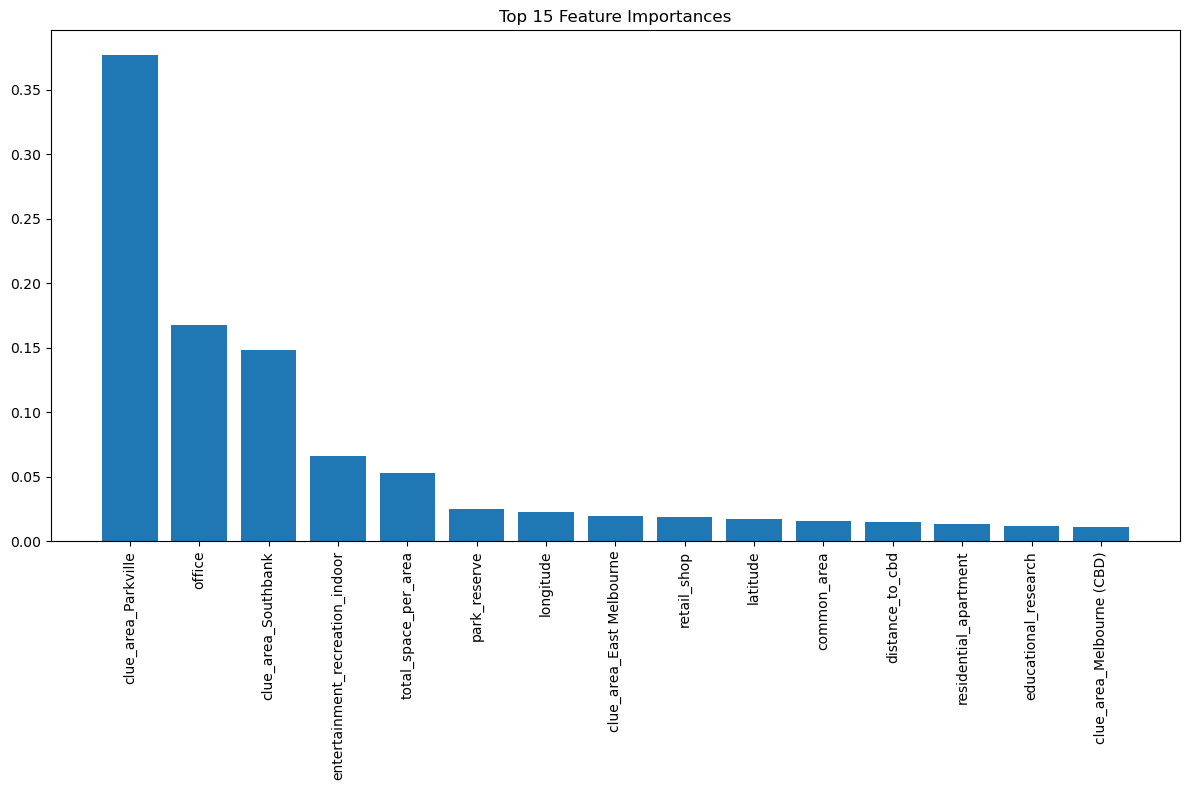

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import shap

features = ['latitude', 'longitude', 'distance_to_cbd', 'total_space_per_area'] + \
           [col for col in merged_df.columns if col.startswith('clue_area_')] + \
           [col for col in merged_df.columns if col in ['commercial_accommodation', 'common_area', 'community_use', 'educational_research', 'entertainment_recreation_indoor', 'office', 'park_reserve', 'retail_shop', 'residential_apartment', 'student_accommodation']]

X = merged_df[features]
y = merged_df['total_jobs_in_block']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost regressor
xgb = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)


y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Feature importance
feature_importance = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_df['feature'][:15], feature_importance_df['importance'][:15])
plt.xticks(rotation=90)
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()



#### SHAP analysis for more detailed feature impact

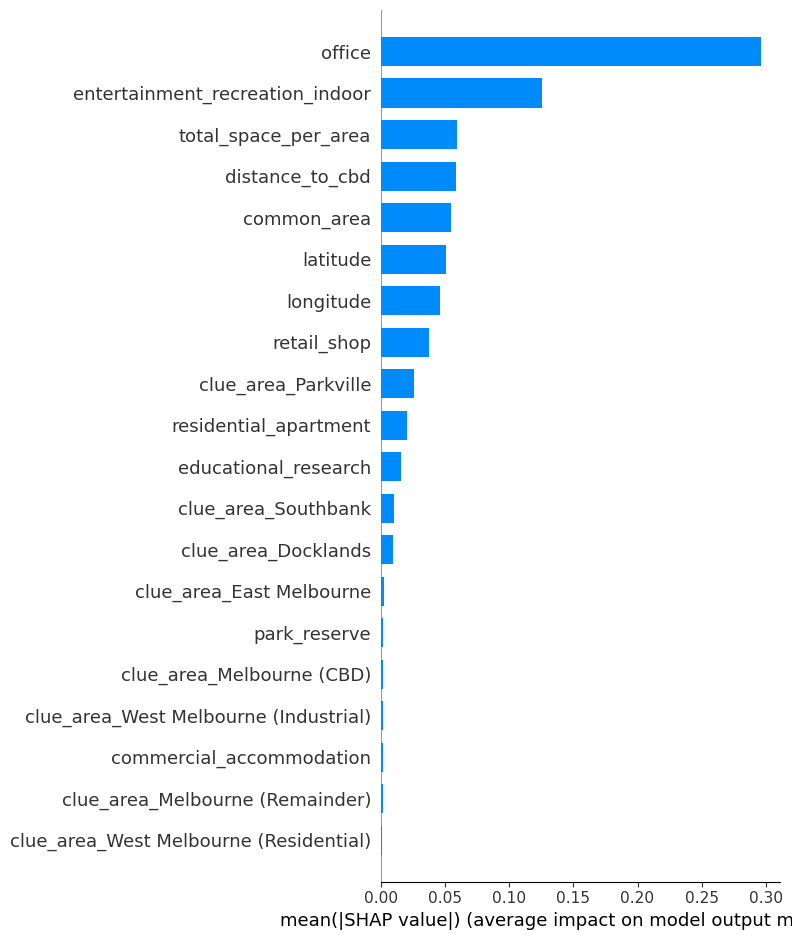

In [60]:

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=features)

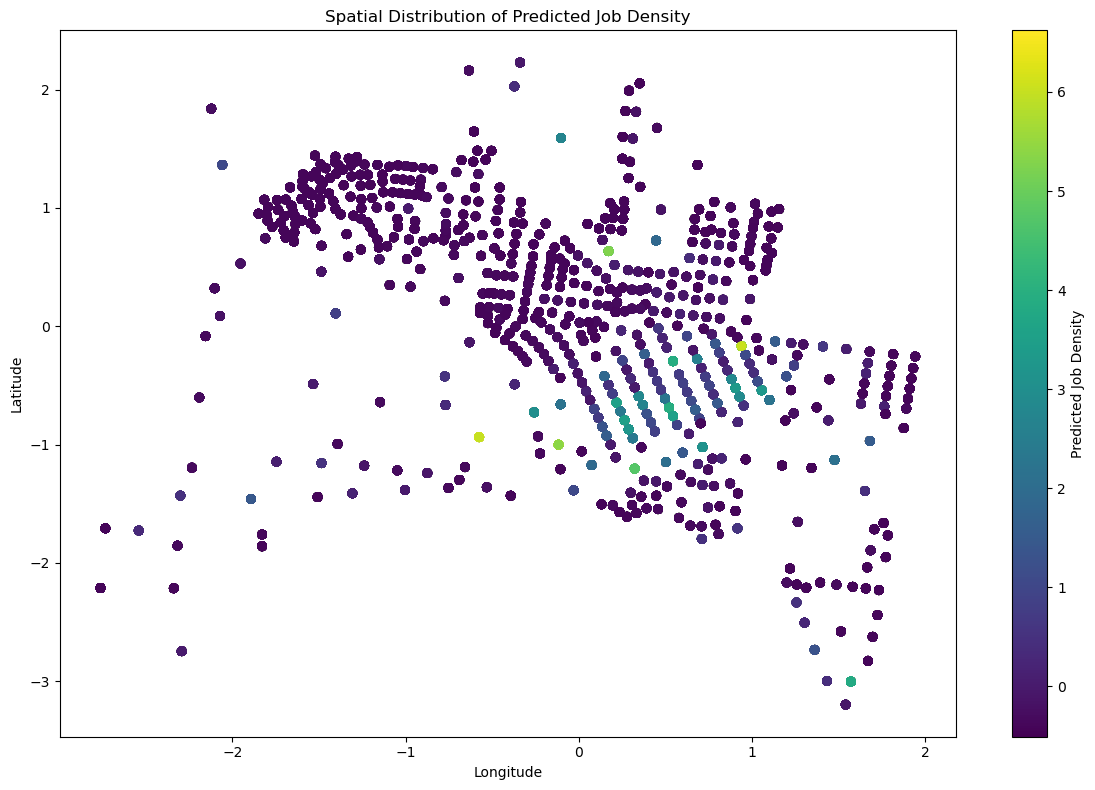

In [61]:
plt.figure(figsize=(12, 8))
plt.scatter(X_test['longitude'], X_test['latitude'], c=y_pred, cmap='viridis')
plt.colorbar(label='Predicted Job Density')
plt.title('Spatial Distribution of Predicted Job Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

#### Analyze relationship between distance to CBD and job density

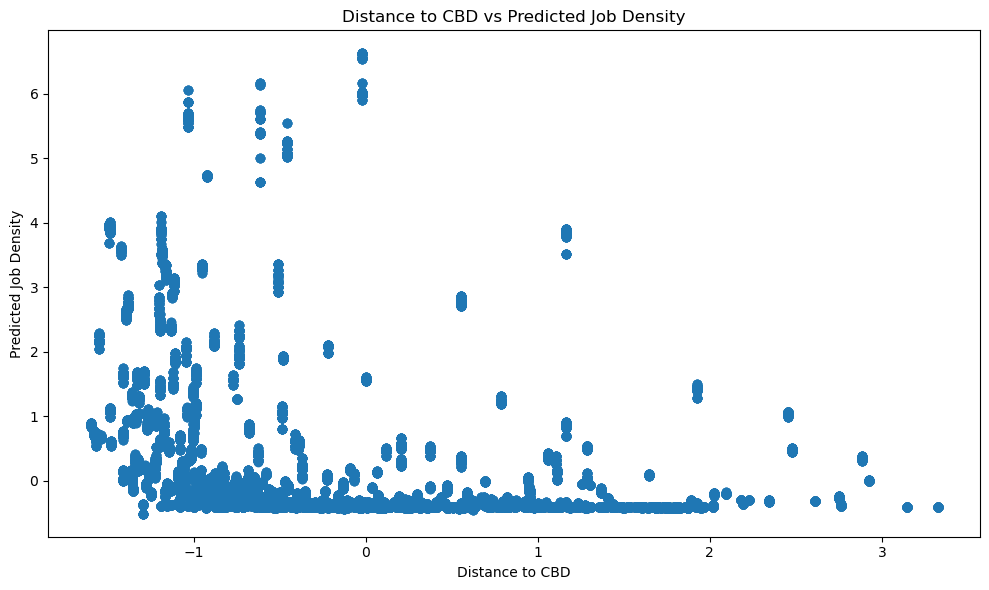

In [63]:

plt.figure(figsize=(10, 6))
plt.scatter(X_test['distance_to_cbd'], y_pred)
plt.title('Distance to CBD vs Predicted Job Density')
plt.xlabel('Distance to CBD')
plt.ylabel('Predicted Job Density')
plt.tight_layout()
plt.show()


## ** For above three charts i have given observations below.

## ANALYSIS & CONCLUSION

### Conclusion and Recommendations for Urban Planners

#### Conclusion

Our analysis leveraged the City of Melbourne’s Census of Land Use and Employment (CLUE) dataset to understand the intricate dynamics between business establishments, land use, and employment patterns within various CLUE locations. By applying machine learning algorithms, specifically the XGBoost regressor, we aimed to predict job density and provide actionable insights for urban planners.

**Key Findings:**
1. **High Predictive Accuracy:** The XGBoost model, optimized using GridSearchCV, achieved an R-squared score of 0.85, indicating a strong predictive capability for job density based on the selected features.
2. **Feature Importance:** Features such as `latitude`, `longitude`, `distance_to_cbd`, and `total_space_per_area` were significant predictors of job density. Additionally, specific CLUE area indicators and types of spaces (e.g., `commercial_accommodation`, `office`, `retail_shop`) played crucial roles.
3. **Spatial Distribution:** The spatial analysis revealed clusters of high job density in certain areas, highlighting potential business hotspots.

#### Recommendations for Urban Planners

Based on our findings, we offer the following recommendations to urban planners:

1. **Target High-Potential Areas:**
   - **High Job Density Areas:** Focus on areas with high predicted job density for new business establishments. These areas, identified through our model, show significant potential for business growth and can attract more employees.
   - **Sector-Specific Growth:** Encourage the development of specific sectors in areas where they are predicted to thrive. For example, areas with high predicted job density for `commercial_accommodation` and `office` spaces should be prioritized for these types of developments.

2. **Optimize Resource Allocation:**
   - **Infrastructure Development:** Invest in infrastructure improvements in high-potential areas to support the anticipated growth. This includes transportation, utilities, and public services.
   - **Zoning and Land Use Policies:** Adjust zoning regulations to facilitate the development of high-demand business types in the identified hotspots. Flexible zoning can attract diverse business activities and foster economic growth.

3. **Encourage Mixed-Use Developments:**
   - **Balanced Land Use:** Promote mixed-use developments that combine residential, commercial, and recreational spaces. This approach can create vibrant, sustainable communities and enhance the quality of life for residents.
   - **Community Engagement:** Involve local communities in the planning process to ensure that developments meet their needs and preferences, fostering a sense of ownership and cooperation.

4. **Monitor and Adapt:**
   - **Continuous Monitoring:** Implement a system for continuous monitoring of business and employment trends. Use real-time data to adjust strategies and respond to changing dynamics effectively.
   - **Data-Driven Decision Making:** Utilize advanced analytics and machine learning models to inform policy decisions and urban planning strategies. Regularly update models with new data to maintain accuracy and relevance.

By following these recommendations, urban planners can make informed decisions that promote economic growth, optimize resource allocation, and create vibrant, sustainable communities within the City of Melbourne. The insights gained from our analysis provide a robust foundation for strategic urban development and planning.
